In [225]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import time
import tqdm

from sklearn.model_selection import ParameterSampler
from sklearn import datasets
import hdbscan

from scipy.spatial.distance import cdist
from scipy.stats import randint
from hulls import ConcaveHull

import clustering

In [139]:
from IPython.core.interactiveshell import InteractiveShell
from importlib import reload
reload(clustering)
from clustering import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

InteractiveShell.ast_node_interactivity = 'all'
sns.set()
sns.set(rc={'figure.figsize':(12,8)})

<module 'clustering' from 'C:\\Users\\Philip\\Documents\\GitHub\\LCI-Clustering\\clustering.py'>

3

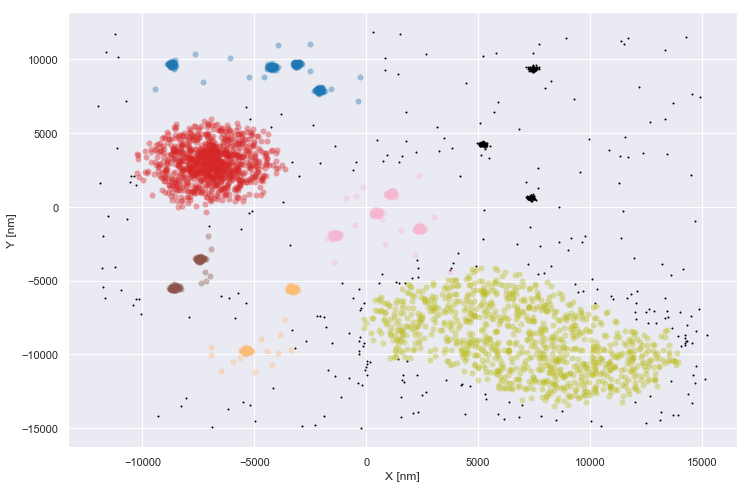

In [141]:
XY = make_training_dataset(size=1000, noise=0.3, std=0.1, state=8)

hdb = hdbscan.HDBSCAN(core_dist_n_jobs=6,min_cluster_size=100,
                      min_samples=59,gen_min_span_tree=True)
_ = hdb.fit(XY)
# hdb.relative_validity_

count_multi_clusters(hdb)
fig, ax = plt.subplots()
plot_clusters_lite(XY, hdb.labels_, ax)

[(-200, 1200), (-1200, 1200)]

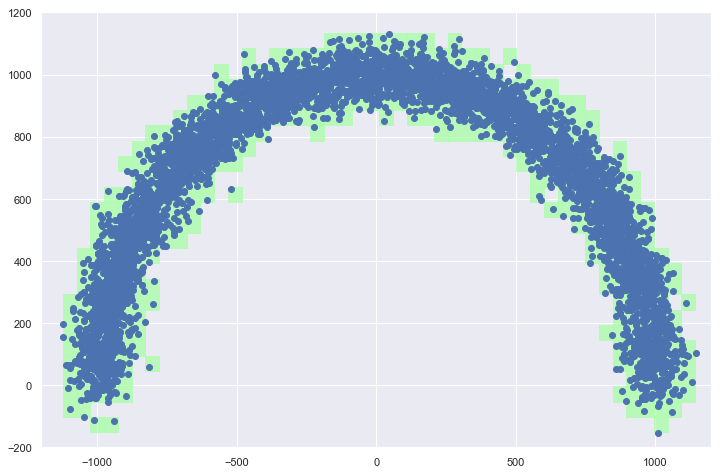

In [316]:
fig, ax = plt.subplots()

XY, labels =  datasets.make_moons(10000, 8, 0.05)
X = XY[labels==0] * 1000

size = 50

nbins = np.ptp(X, axis=0) / size
hh, locx, locy = np.histogram2d(*X.T, bins=np.ceil(nbins))
xwidth, ywidth = np.diff(locx).mean(), np.diff(locy).mean()
mask = hh != 0
area = mask.sum() * size*size

locx = locx#[:-1] + xwidth
locy = locy#[:-1] + ywidth
yy, xx = np.meshgrid(locy, locx)

ax.plot(*X.T, 'o')
light = ListedColormap([[0, 0, 0, 0], [0.66, 1, 0.66, 0.75]])
_ = ax.pcolormesh(xx, yy, mask, cmap=light)
ax.grid()

ax.set(xlim=[-1200, 1200], ylim=[-200, 1200])
plt.show()

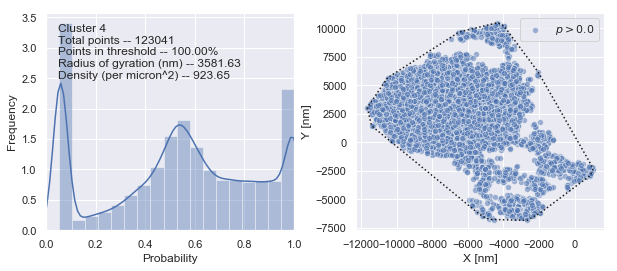

In [136]:
plt.close('all')
fig, axes = plt.subplots(1, 2, figsize=[10,4])
plt.subplots_adjust(wspace=0.25)
view_cluster(hdb, XY, 4, p=0.0, axes=axes)

In [133]:
# pd.DataFrame(XY, columns=['x [nm]', 'y [nm]']).to_csv('Training_VERYHARD.csv')